<h1><font color='DarkBlue'>PRACTICAL PHYLOGENETICS NOTEBOOK</font></h1>
<hr>
Dr Dave Lunt d.h.lunt@hull.ac.uk

<h2><font color='Blue'>Goals of these experiments</font></h2>

This Jupyter notebook will take you through two case studies using phylogenetic analysis to understand biological questions. This will involve aligning sequences and building maximum likelihood phylogenetic trees, followed by annotation an interpretation.

We hope that this will give you 
- experience in analysing DNA sequence data
- Understanding of the steps involved in phylogenetics
- Knowledge about the compleities of the specific case studies we are using

You will write up one of the case study analyses you perform today for your assessment.

<h2><font color='Blue'>Introduction to Jupyter computational notebooks</font></h2>

<font color=red>**FIRSTLY, DO NOT PANIC. EVERYTHING YOU NEED TO KNOW ABOUT COMPUTERS AND CODE WILL BE TAUGHT HERE. YOU WILL BE ABLE TO DO THIS EVEN IF YOU HAVE LITTLE EXPERIENCE WITH COMPUTERS**</font>

This document that you are reading now is a **Jupyter Notebook**. It is a web browser based text editor that is also able to execute scripts ie  code. Today we are using the statistical programming language `R`, but we could also run `Python`, `bash` or many other languages. Much of modern bioinformatics is done in the `Python` language, but `R` is used also.

Scripts are found in the grey cells (see below) and have something like `In [ ]:` or `[1]` to their left in the margin. To execute a script, click the cell below and then press SHIFT+ENTER, or instead the triangular "Run" button in the tool bar above. Try running this code below now 

In [ ]:
print('Hey there, good job in running the R print command!')

This code cell (containing "print('Hey...") should have executed when you pressed SHIFT-ENTER and it's output was printed below the cell ("Hey there, good job..."). All Jupyter commands run in a similar fashion

Some parts of this notebook are code, some parts output, and the rest is documentation (like this sentence). As you read through today you can think of it in these 3 categories.

<h4><font color='Blue'>ACTION:</font></h4>

1. Try editing the code below and re-running. Replace "Good job" with "Even better job"
2. Instead of the `Run` button at the top you can click in the cell and press Shift-Enter to run the code. Most people find this faster, edit the cell below then give it a try:

In [ ]:
print('Hey there, really good job!')

<h4><font color='Blue'>ACTION:</font></h4>

Now edit the cell above to have two print statements. On a new line type `print('Your new phrase')` and then run it. It might be easier to copy/paste and just change the pasted phrase. If it doesn't run well, you have a typo. Yes, its always a typo.

**Congratulations, you have now run, copy/pasted and edited cells. Those are all the skills you will need today**

This iterative edit-and-run approach is how much of modern biological data is explored and analysed. This mix of code and explanation you are seeing in this Jupyter notebook is called "literate programming"

This notebook will take you through the anaysis of the two case studies. For each case study you will need to run several cells just as you did above. The programs will then align and clean the DNA sequences, build a tree and annotate it. **In most cases you will only need to run the cell just as you did above. In a few cases you will be able to tweak the script just a bit following clear instructions**. Good luck!

<h1><font color='Blue'>STUDY1: A NEW SPECIES OF APE?</font></h1>

![orangutan males](images/Bornean,_Sumatran_&_Tapanuli_orangs.jpg)

_Figure 1:_ Male Bornean, Sumatran and Tapanuli orangutans, three suggested species [wikipedia](https://en.wikipedia.org/wiki/Orangutan). 

The first aim of today is to investigate what phylogenetics can tell us about different species of great ape. It is, of course, complex. You might like to think how you would conceptually go about trying to get information using a phylogenetic approach.

**Table 1: Latin names and common names of species in this practical.** As always, Googling is encouraged.

| Name             | Common name           | Name  | Common Name |
| ----------------|:----------------------| --------------|:---------- |
| Macaca macaca | Macaque (outgroup)|  Homo sapiens sapiens | Modern humans
| Hylobates lar      | Gibbon (outgroup)     |  Homo sapiens neanderthalis  | Neanderthals (extinct)|
| Gorilla gorilla | Western Gorilla      | Homo sapiens denisovan | Denisovans (extinct)
| Gorilla beringei | Eastern/mountain Gorilla | Pongo abelii | Sumatran orangutan     |
| Pan troglodytes | Chimp      |   Pongo pygmaeus | Bornean orangutan   |
| Pan paniscus | Bonobo      |     Pongo tapanuliensis | Tapanuli orangutan|
|

<h2><font color='Blue'>How much data do you have?</font></h2>
Your working directory has some DNA sequence files in fasta format. There are a number of ways to determine the number of sequences in a file, here is a quick count. 


In [ ]:
count <- system("grep -c '>' data/ape.fas", 
                intern=TRUE)

print(paste("Number of sequences:", count))

It should have displayed the number of sequences in the `ape.fas` file in the `data` directory

If you got `Warning message .... had status 2` it is because you haven't pointed it at `ape.fas` edit the code to point at this file and then re-reun

<h4><font color='Blue'>QUESTIONS:</font></h4>

- Can you see which part of the above code specifies the fasta file `ape.fas`?

- How could you run this on a different file in the data directory called `testseqs.fasta`? 

You don't need any coding knowledge to answer these. The idea here is that in much of bioinformatics you can modify someone else's code to point at your own data file and everything will work. 

<h4><font color='Blue'>ACTION:</font></h4>

Try it, a copy of the cell is below, just change the name and re-run the cell to count `testseqs.fasta`. Or ask for help if you can't quite see it. Remember that the file is within the `data` directory. If you've done it correctly (watch for typos) then the number of sequences reported will change.

In [ ]:
count <- system("grep -c '>' newfiletocount", 
                intern=TRUE)

print(paste("Number of sequences:", count))

### Some bioinformatics for processing sequences

Below we use a bioinformatics program `seqkit` to allow us more complex analyses. Here we will find the number of sequences plus a lot of other information.

In [ ]:
system("seqkit stats -T -b data/*.fas* | csvtk pretty -t > DNAstats.txt")

This command has written its output concerning the statistics of DNA numbers and lengths to a text file. Can you guess from the code above what it was called? Tip: command line programs very often indicate where the data is going, the destination or output file, with a greater than symbol.

<h4><font color='Blue'>ACTION:</font></h4>

Double click the file from the left list of files to open a new tab showing this data. Which data file has the most sequence information?

If you are wondering why it shows data for many files, not just one, its because the * wildcard symbol here means "anything" so it will process files that match 
1. starts with anything (*)
2. has ".fas" in the middle 
3. and then anything after that (*)

Look at the file names in the data directory and see which filenames you think would match "`*.fas*`". Discuss in your group and with a demonstrator.

<hr>
<h2><font color='Blue'>Aligning the sequences</font></h2>
In order to carry out a valid analysis you have to align the DNA sequences. If you're not quite sure why, look at the images below and discuss with a demonstrator. 

![Aligned DNA sequence](./images/aligned.png "A DNA sequence alignment")
_A DNA sequence alignmnet. Each character (column) can be directly compared across the different species_

![Un-aligned DNA sequence](./images/unaligned.png "An incomplete  DNA sequence alignment")
_A set of DNA sequences not completely aligned. Each character (column) cannot be directly compared across the different species as some are 'shifted' so even though they are very similar, they look enormously different when just comparing down each column (character)_

To align the sequences we will use a program called MAFFT [2]. What piece of information will we have to add to the code? Yes, the name of the input DNA sequence file to be aligned.

<h4><font color='Blue'>ACTIONS:</font></h4>

- Change the name of the file in the following code to be `ape.fas`
- run the cell

In [2]:
# ---------------------------
# Align sequences using MAFFT
# ---------------------------

system("mafft --auto --quiet data/ape.fas > ape.afa", intern=TRUE)

character(0)

In the command above can you see where we name the output file? The greater than symbol `>` is used to specify where the output of a command goes, in this case to `ape.afa`. Did it work? Can you find the `ape.afa` file in the file list to the left of this window? The `.afa` extension stands for 'aligned fasta'

Above we had some "arguments" (parameters or settings) specified with a "--"prefix. It is very common when running analysis programs at the sommand line, or from R, that their arguments (settings) are specified with a dash or doubledash. Above "`--auto --quiet`" tells it to run with automatic settings and not to bother us with lots of output. You can delete "`--quiet`" and rerun if you want to see it all, it won't change the output data.

<hr>
<h2><font color='Blue'>QC the alignment</font></h2>
Trimal [3] quality controls the alignment, removing badly aligned regions and alignment artefacts. 

Can you see that the input file specified `ape.afa` is the output file from the previous step? Can you identify the name of the output file that it will write? This should appear in your files list once you have run the cell.

In [3]:
# ------------------------------------------
# Quality control the alignment using trimal
# ------------------------------------------
# -in and -out indicate source and destination files
# -gappyout and -keepheader are settings

system("trimal -in ape.afa -out ape_trimmed.afa -gappyout -keepheader")

<hr>
<h2><font color='Blue'>Tree reconstruction</font></h2>
This section will reconstruct a maximum likelihood phylogenetic tree using the sequence alignment you have produced. We will use the program FastTree [4].

In [4]:
# -------------------------
# Build tree using FastTree
# -------------------------
#

system("FastTree -gtr -nt ape_trimmed.afa > ape.nwk")

<hr>

The treebuilding program "FastTree" gives lots of output, you can just ignore all those details. When it is finished a file called `ape.nwk` will appear (remember that output files are often indicated with a greater than symbol >). This is a Newick tree file (.nwk) containing the tree as bracket notation text.

<h4><font color='Blue'>QUESTION:</font></h4>

What treefile (.nwk) has just been written by the build tree cell above? Double click the file in the left hand list to have a look at a newick treefile.

<hr>
<h2><font color='Blue'>Tree Annotation and Viewing</font></h2>

A phylogenetic treefile is in bracket notation format (called Newick) and not very meaningful to examine. Here is a simple exampe, your newick file is the same, but more complex.

```
((A,B),(C,D));
```
We are going to convert this to a graphic using R, and then annotate it to be easier to interpret. To do this we are going to use a tree graphics program called `ggtree`.

<h4><font color='Blue'>ACTION:</font></h4>

Take your newick treefile name and enter it into the cell below to replace "tree.nwk"

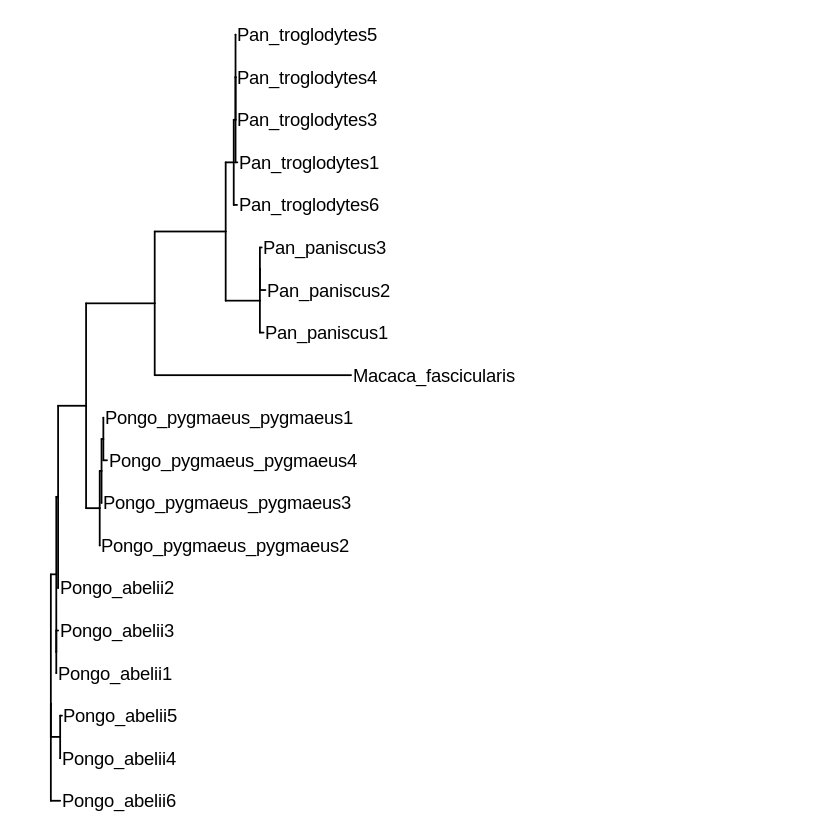

In [6]:
# -----------------------------------
# Drawing the phylogeny using ggtree
# -----------------------------------
# install and load the software we need
# install.packages("reshape2")
# install.packages("ggstance")
library("ggtree")
library("reshape2")
library("ggplot2")
library("treeio")
library("ggstance")  
library("ape")


tree = read.tree("ape.nwk")  # First we import the tree file into a variable

apes_tree = as.treedata(tree)

# draw the tree
ggtree(apes_tree) + 
    geom_tiplab() + 
    theme(legend.position = "none") + xlim(0,1);

If you see a graphic image of a phylogenetic tree, congratulations! If not please ask for a little help, its probably a quick fix for a demonstrator.

<h4><font color='Blue'>NOW ROOT THE TREE</font></h4>

Your tree will probably look very odd because it isn't yet rooted correctly. Use the next cell to root it by entering "Macaca_fascicularis" (Macacque) instead of "outgroup"

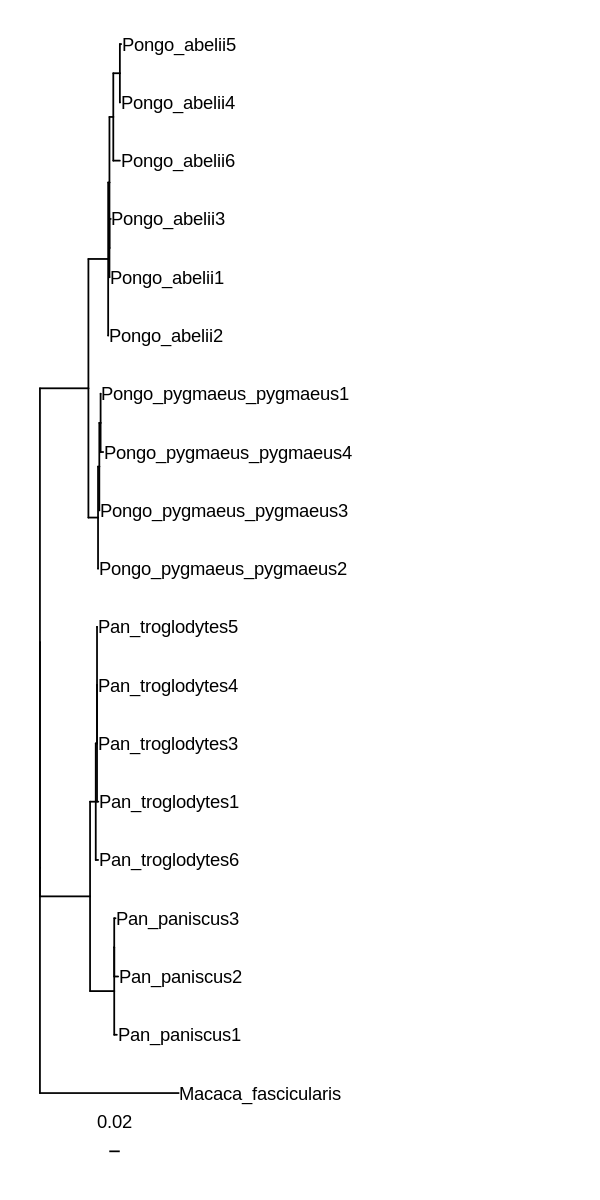

In [111]:
# -----------------------------------
# Rooting and redrawing
# -----------------------------------
# set the outgroup taxon and root the tree
rooted_apes_tree = root(apes_tree, 
                    "Macaca_fascicularis", 
                    resolve.root = TRUE)

#draw out the tree
ggtree(rooted_apes_tree) + 
    geom_tiplab() + 
    theme(legend.position = "none") +
    xlim(0,1) +
    geom_treescale() # adds the scale


You should now have a tree that reveals a lot about the relationships betwen these species. Remember that there is a table with the species names earlier in this document. It will be easier to interpret though when you put it into a report if you annotate and colour it by taxon.

<h4><font color='Blue'>NOW ANNOTATE THE TREE:</font></h4>
Although you now have 'the answer' it is not so easy to study this tree. You will need to compare the divergences between the two species of orangutan and compare those to the divergences between the two species of chimpanzee. In this simple tree its not too hard, but in general phylogeneticists label and colour to maintain focus on the correct comaprisons. You are now going to use the script below to colour in the tips by their species identity. 

Run the cell and examine the tree

Warning message in label[(ntip + 1):N] <- phylo$node.label:
“number of items to replace is not a multiple of replacement length”
Warning message in label[(ntip + 1):N] <- phylo$node.label:
“number of items to replace is not a multiple of replacement length”


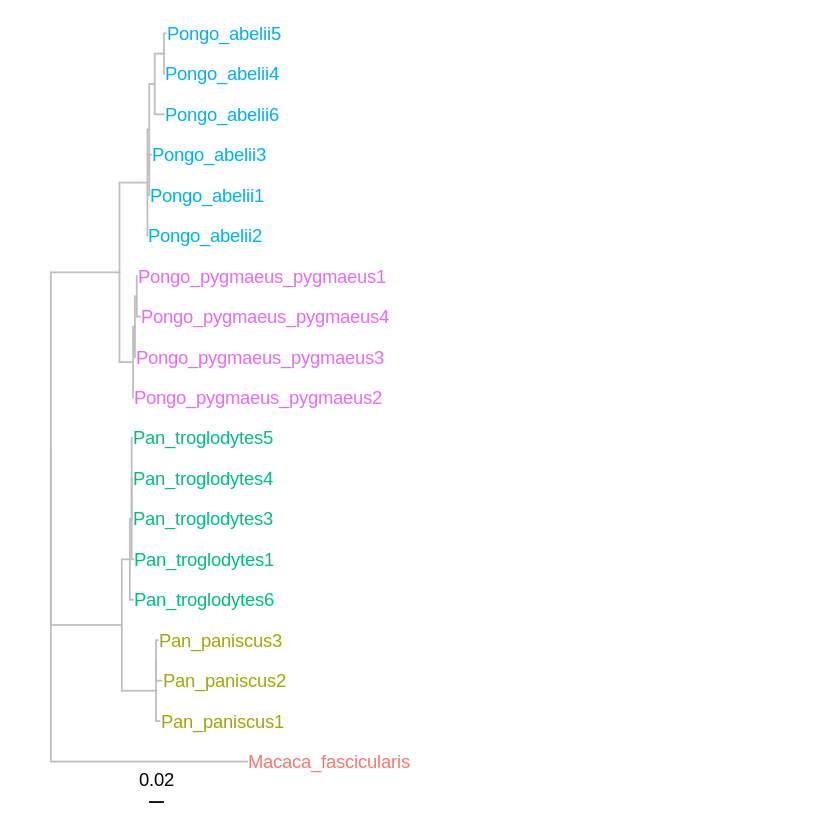

In [31]:
# -----------------------------
# Colouring the tree label text
# -----------------------------

groups = read.table("ape.tsv.txt",  # We import the metadata into a variable  
                        sep = "\t",  # Tell R the input is tab separated
                        col.names = c("Sequence", "Species"),  # Names of columns
                        header = FALSE,  # Tell R there is no header in the file
                        stringsAsFactors = FALSE)  # Convert strings to factors


apes = full_join(as_tibble(rooted_apes_tree), 
                 groups, 
                 by = c("label" = "Sequence"))

rooted_apes = root((as.treedata(apes)), 
                    "Macaca_fascicularis", 
                    resolve.root = TRUE)

ggtree(rooted_apes, color = "grey") + 
       geom_tiplab(aes(color = Species)) + 
       xlim(0, 1) + theme(legend.position = "none") +
       geom_treescale(color = "black")


<h3><font color=red>IMPORTANT, SAVE YOUR FILE</font></h3>
Make sure that you save and take away a copy of you tree file image in a format suitable to insert into your final report. Run the cell below and then find the file in your working directory and save it somewhere accesible.

In [ ]:
# --------------------------------
# Save the tree as a graphics file
# --------------------------------

ggsave("ape.png")


`ggsave` is a standard R package and can save in lots of formats and allows you to control the final image output, or just use sensible dfaults. If you want a PDF instead just change the file extension to be `.pdf`. You can google `ggsave` commands if you are interested in having more control over the image. This is optional however, the standard output is OK for your report.

<h4><font color='Blue'>SPECIES DIFFERENTIATION</font></h4>

Looking at the tree, it would seem the two *Pan* clades are as distant from each other as the two *Pongo* clades
 
The scale along the bottom is genetic distances from 0 to 1, so 0.06 would be 6%. Find the common ancestor node of each genus. What is the distance between the common ancestor of both Pan species and the tree tips? What is that value for Pongo? Do you think it is very different?

When this analysis was first done orangutans were all classified as the same species, whereas there were two Pan species. Do you think that classification accurately reflects evolutionary history? Does the classification in this way have any negatives for conservation planning? Discuss in your group.

Soon after these analyses on single mitochondrial genes, exactly as you have done here, orangutans were divided into two species.

## Pause

You have just carried out a lot of bioinformatics in a Jupyter notebook, on a server, using R. You have:
- loaded a DNA data file
- aligned a DNA sequence file
- quality controled the alignment
- constructed a maximum likelihood phyogenetic tree
- created an annotated figure of the phylogeny

Well done!

This was quite a lot of work to do the first time, trying to understand how to pass a specific data file through the analytical satges to create a phylogeny. Fortunately, as you learned above, doing it again on a different data file just requires a simple change, ie specifying a different fil, and this is why we do analyses programmatically (quick and easy the second time through).

Below you can quite rapidly analyse a "big ape" data set, containing a lot more sequences, by rerunning the same commands with different data. It should not take long. In the second case study (below) we are going to swap from apes to HIV, but again it should be rapid because the commands will be very similar.

<hr>
<h2><font color='Blue'>A big data analysis of great apes</font></h2>

One very useful aspect of using code to carry out analyses is that once you have written it, and it works, its very little effort to re-run it again on any number or any size of other data sets.

Here I have collected from GenBank whole mitochondrial genomes (about 16,000 nucleotides per genome) from a lot of great apes including humas, neanderthals, and species of gorillas in addition to the species you have just analysed. If you want to know how large the data is you can examine it in the `DNAstats.txt` file that you generated above.

The file is large but we can just run the same code again. For efficiency reasons I've compressed the code below a little, but its the same as you have just run.

This big analysis gives you the opportunity to decide whether the similarity of divergence between groups that you have just observed is true more widely. When you have produced their big trees you should discuss what the divergence levels might mean with your demonstrators.

The sequence data is in the `data` directory in a file called `big_ape.fas`. Make sure your code points at the correct input file.

Run this cell to align, trim the alignment, and then build a tree. It might take a few minutes to complete. When there is a number not an asterisk in the left margin then it is complete.

In [ ]:
# Align
system("mafft --auto --quiet data/big_ape.fas > big_ape.afa")
print("The sequence alignment has finished")
# Trim
system("trimal -in big_ape.afa -out big_ape_trimmed.afa -gappyout -keepheader")
print("The alignment trimming has finished")
# Tree build
print("The phylogenetic tree construction has started")
system("FastTree -gtr -nt big_ape_trimmed.afa > big_ape.nwk")
print("The phylogenetic analysis has finished")

Expect this to take a couple of minutes. Remember if there is an asterisk in the top left "`In [*]:`" then it is still working, when it is a number it is finished. 

What tree file (.nwk) did it write? You will need this below

If this completed without errors then you can just run the cell below and see the output tree. You may want to adjust colours and re-run a few times. If you had an error, see if you can spot what went wrong, but seek assistance if not.

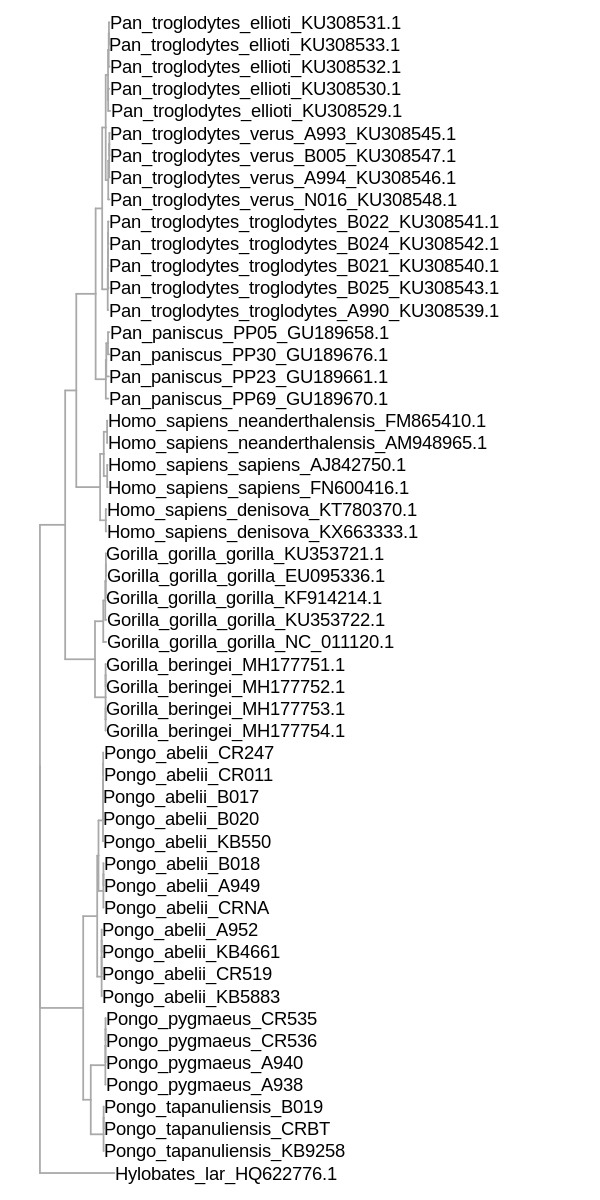

In [130]:
# -----------------------------
# Colouring the tree label text
# -----------------------------

# First we import the metadata
groups = read.table("big_ape.tsv.txt",         # We import the metadata into a variable  
                    sep = "\t",                # Tell R the input is tab separated
                    col.names = c("Sequence",  # Names of columns
                                  "Species"),  
                    header = FALSE,            # Tell R there is no header in the file
                    stringsAsFactors = FALSE)  # Convert strings to factors


# Now we import the tree file into a variable
big_tree = read.tree("big_ape.nwk")  


# Then we need to attach the metadata to the tree
big_apes = full_join(as_tibble(big_tree),       # Input the tree
                 groups,                        # Give it the group metadata
                 by = c("label" = "Sequence"))  

# After this we root the tree at the outgroup
rooted_big_apes = root((as.treedata(big_apes)),  # We input a tree...
                    "Hylobates_lar_HQ622776.1",  # Give it a species...
                    resolve.root = TRUE)         # And tell R to root the tree at that species

# We create a space to plot below
options(repr.plot.width=5, repr.plot.height=10)

# Then we draw the tree using ggtree
ggtree(rooted_big_apes,  # Tell ggtree to draw a tree from this variable 
       color = "darkgrey") +                       # The colour of the branches
       geom_tiplab() +        # Tell ggtree to label tips according to species
       xlim(0, 1) +
       theme(legend.position = "none")         # Use theme to remove the legend
       


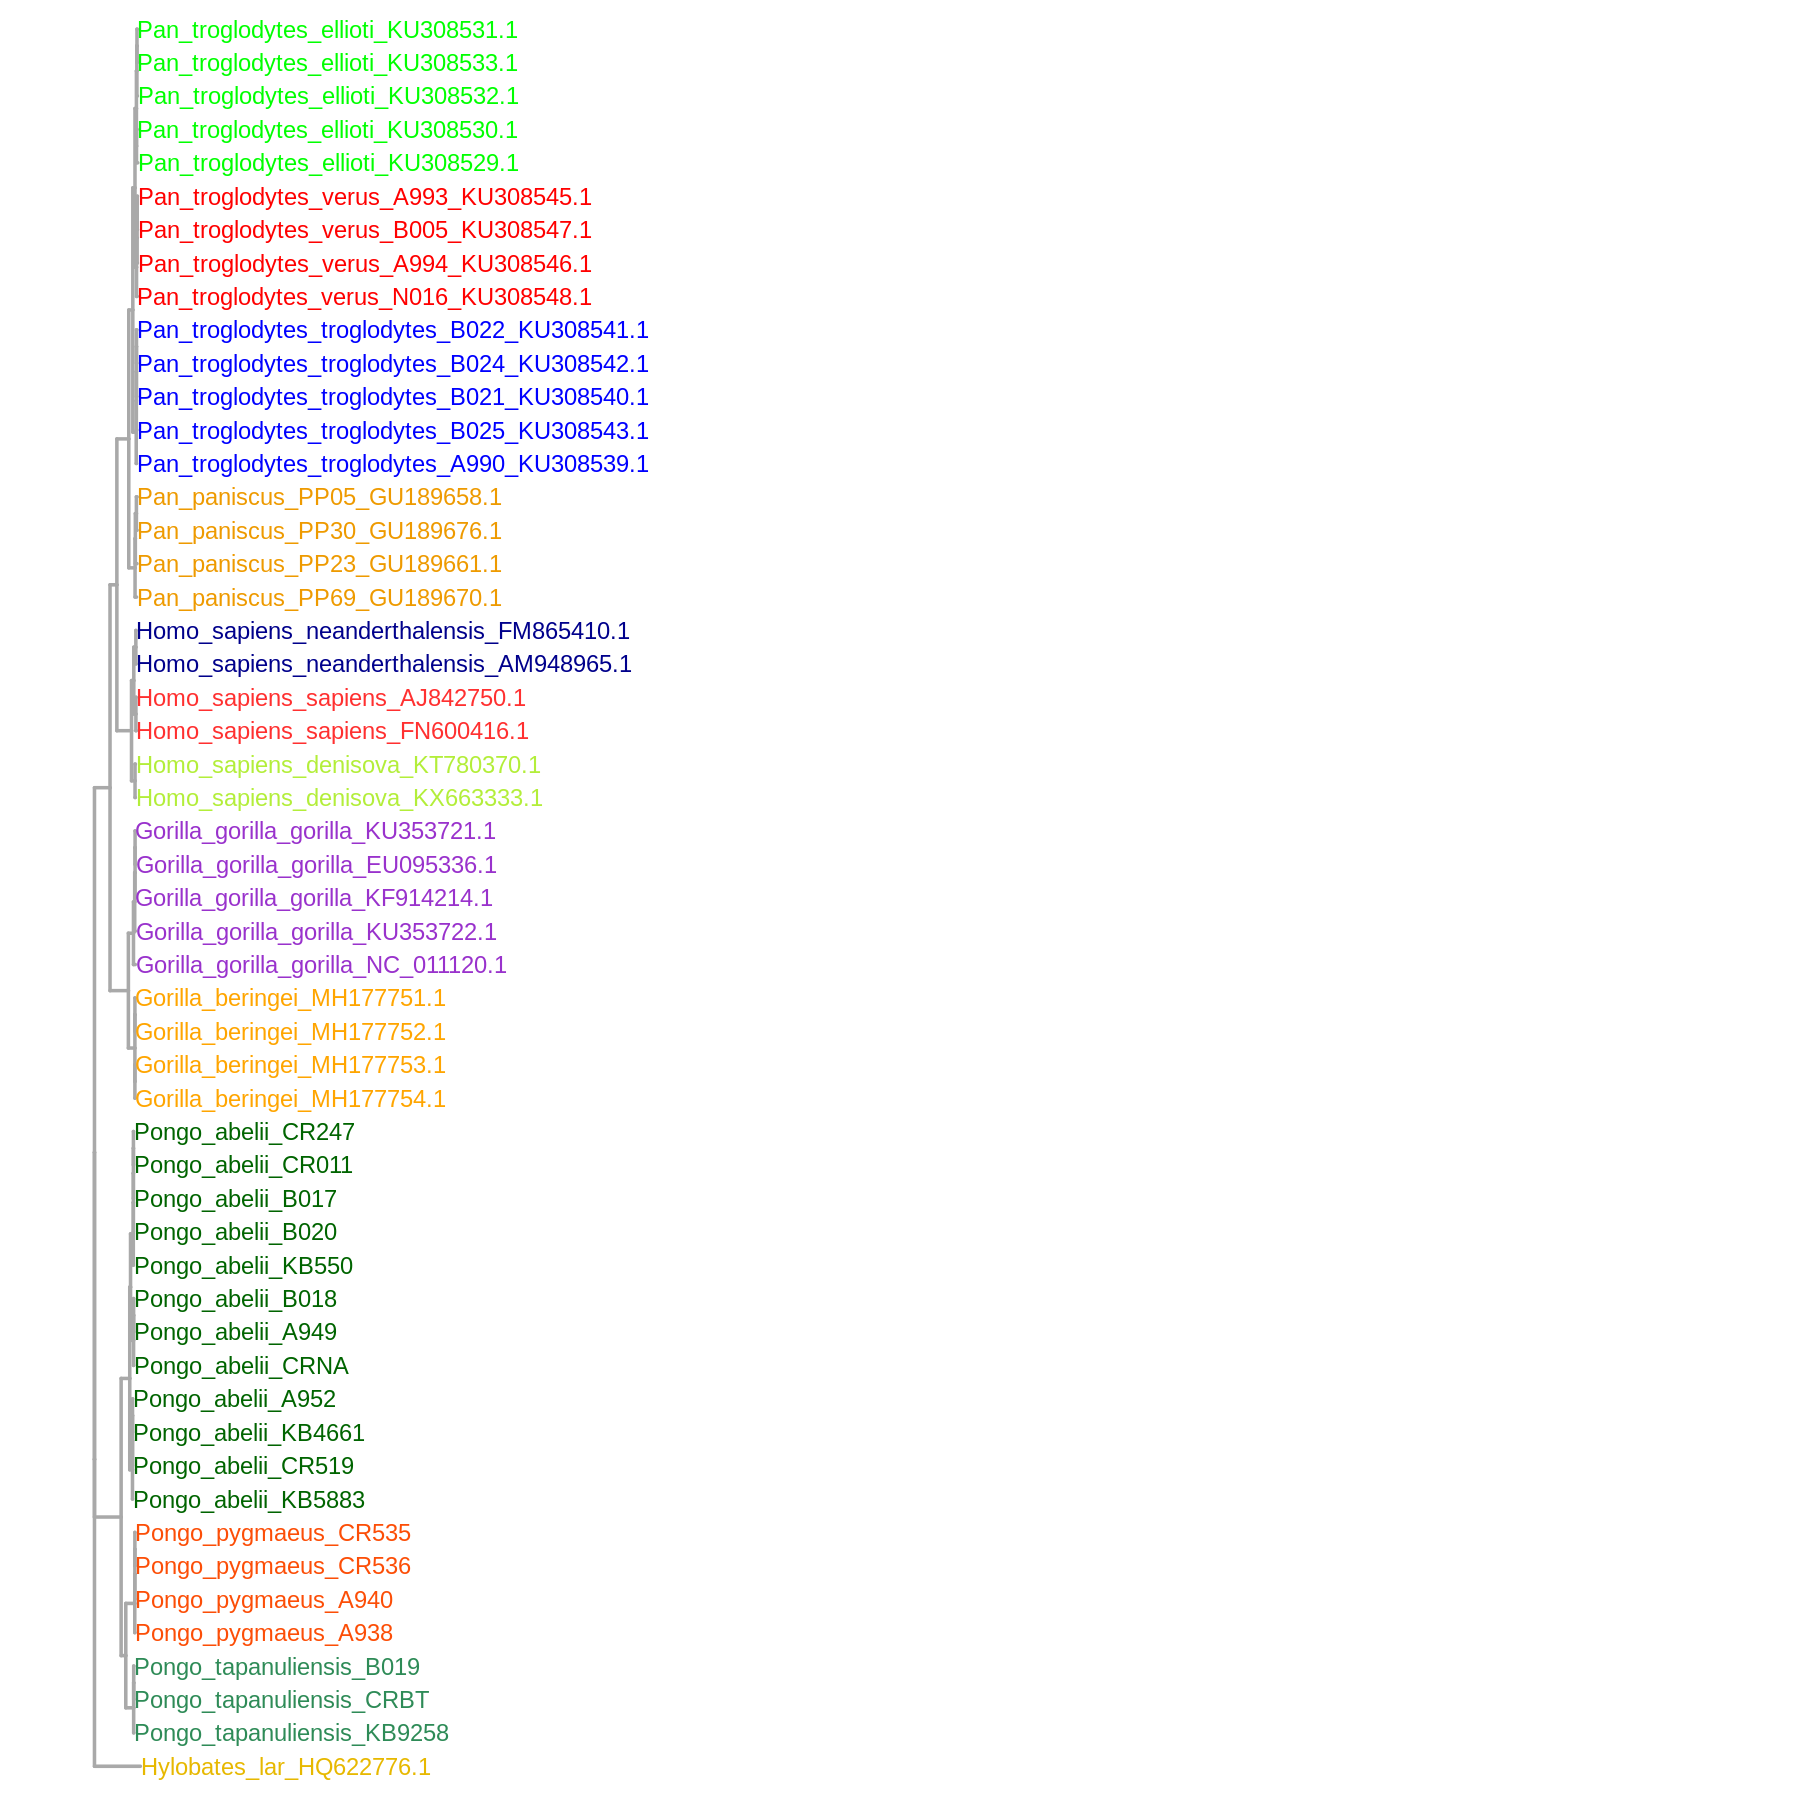

In [172]:
# -----------------------------
# Colouring the tree label text
# -----------------------------

# First we import the metadata
groups = read.table("big_ape.tsv.txt",         # We import the metadata into a variable  
                    sep = "\t",                # Tell R the input is tab separated
                    col.names = c("Sequence",  # Names of columns
                                  "Species"),  
                    header = FALSE,            # Tell R there is no header in the file
                    stringsAsFactors = FALSE)  # Convert strings to factors

# Next we aassign colours to each species
big_ape_colors = c(Hylobates_lar = "#E7B800",
                              Pongo_pygmaeus= "#FC4E07", 
                              Pongo_abelii = "darkgreen",
                              Pongo_tapanuliensis = "seagreen",
                              Gorilla_beringei = "orange",
                              Gorilla_gorilla_gorilla = "darkorchid",
                              Homo_sapiens_neanderthalensis = "darkblue",
                              Homo_sapiens_sapiens = "firebrick1",
                              Homo_sapiens_denisova = "olivedrab2",
                              Pan_troglodytes_verus = "red",
                              Pan_troglodytes_troglodytes = "blue",
                              Pan_paniscus = "orange2",
                              Pan_troglodytes_ellioti = "green")


# Now we import the tree file into a variable
big_tree = read.tree("big_ape.nwk")  


# Then we need to attach the metadata to the tree
big_apes = full_join(as_tibble(big_tree),       # Input the tree
                 groups,                        # Give it the group metadata
                 by = c("label" = "Sequence"))  # 

# After this we root the tree at the outgroup
rooted_big_apes = root((as.treedata(big_apes)),  # We input a tree...
                    "Hylobates_lar_HQ622776.1",  # Give it a species...
                    resolve.root = TRUE)         # And tell R to root the tree at that species


# We create a space to plot below
options(repr.plot.width=15, repr.plot.height=15)

# Then we draw the tree using ggtree
ggtree(rooted_big_apes,  # Tell ggtree to draw a tree from this variable 
       color = "darkgrey", size=1) +                       # The colour of the branches
       geom_tiplab(aes(color = Species), size=5) +     # Tell ggtree to label tips according to species
       xlim(0, 5) +
       scale_color_manual(values=big_ape_colors) +
       theme(legend.position = "none")         # Use theme to remove the legend
       


In [ ]:
ggsave("big_apes.png")

Check the files list to make sure that the tree has saved and looks how you intended. You will need this tree for your report. You can alter and recreate the tree under the same, or a different name.

<h2><font color='Blue'>It's a bit more complicated than that...</font></h2>

There is no level of percentage sequence divergence that determines what is a species. So what can this tree really tell us? Well, amount of sequence divergence from closest relatives gives us a good initial picture of the system, and can give a framework on which to carry out more sophisticated analyses. Evolutionary biologists have sequenced the entire nuclear genomes of these species (you have analysed the much smaller mitochondrial genomes). This allows them to look at estinates of coalescent date, evidence for hybridization and many other biological aspects. 

<h2><font color='Blue'>Well Done</font></h2>

You are now finished with case study 1, the apes. Case study two, the origins of HIV, will be much faster now you have experience.

<h4>Please feel free to take a short break here.</h4>
<hr>

<h1><font color='DodgerBlue'>STUDY2: WHAT ARE THE ORIGINS OF HIV?</font></h1>

![HIV](images/HIV.png)

<hr>

**QUESTION: Has HIV (human immunodeficiency virus) coevolved with humans or does it have a recent zoonotic origin?**

How can you test this? You now have all the skills required. We are going to repeat some of the work described by Sharp and Hahn (2011) in their paper "Origins of HIV and the AIDS Pandemic". Their figure 4 is very informative, and Zimmer and Emlen redraw it in their (3rd edition) Figure 8.12. 

Today you are going to reanalyse the HIV and SIV sequence data from great apes to produce a simlar figure and answer the question set above regarding zoonotic transfer. 

<h3><font color='DodgerBlue'>Sequence data</font></h3>

I have prepared aligned fasta files for you containing SIV and HIV sequence data from the *env* gene (Google it). They are called `SIVHIVspecies_ENV.afa` and you will need this alignment file name to enter below

It would be useful for you to know how many sequences were in each file, you calculated this earlier today for different files. Paste in the code you used earlier (from the "How much data do you have" section where the code begins `count...`) into the cell below and describe the sequences.

I would highly recommend giving it a unique output filename such as `DNAstats-HIV.txt`. What would happen if you did not change the name?

<h3><font color='DodgerBlue'>Tree reconstruction</font></h3>

In [ ]:
#HIV
cat("The analysis has begun, this will take a few minutes, please be patient\n")

# # Alignment has already been done, so this is commented out
# !mafft --auto --quiet data/SIVHIVspecies_ENV.fasta > SIVHIVspecies_ENV.afa
# print("\nThe sequence alignment has finished")

# Trim
cat("Starting alignment trimming")
system("trimal -in data/SIVHIVspecies_ENV.afa -out SIVHIVspecies_ENV_trimmed.afa -gappyout -keepheader", intern=TRUE)
cat("The alignment trimming has finished\n")

# Tree build
cat("Starting construction of phylogenetic tree\n")
system("FastTree -gtr -nt SIVHIVspecies_ENV_trimmed.afa > SIVHIVspecies_ENV.nwk", intern=TRUE)
cat("The phylogenetic analysis has finished")

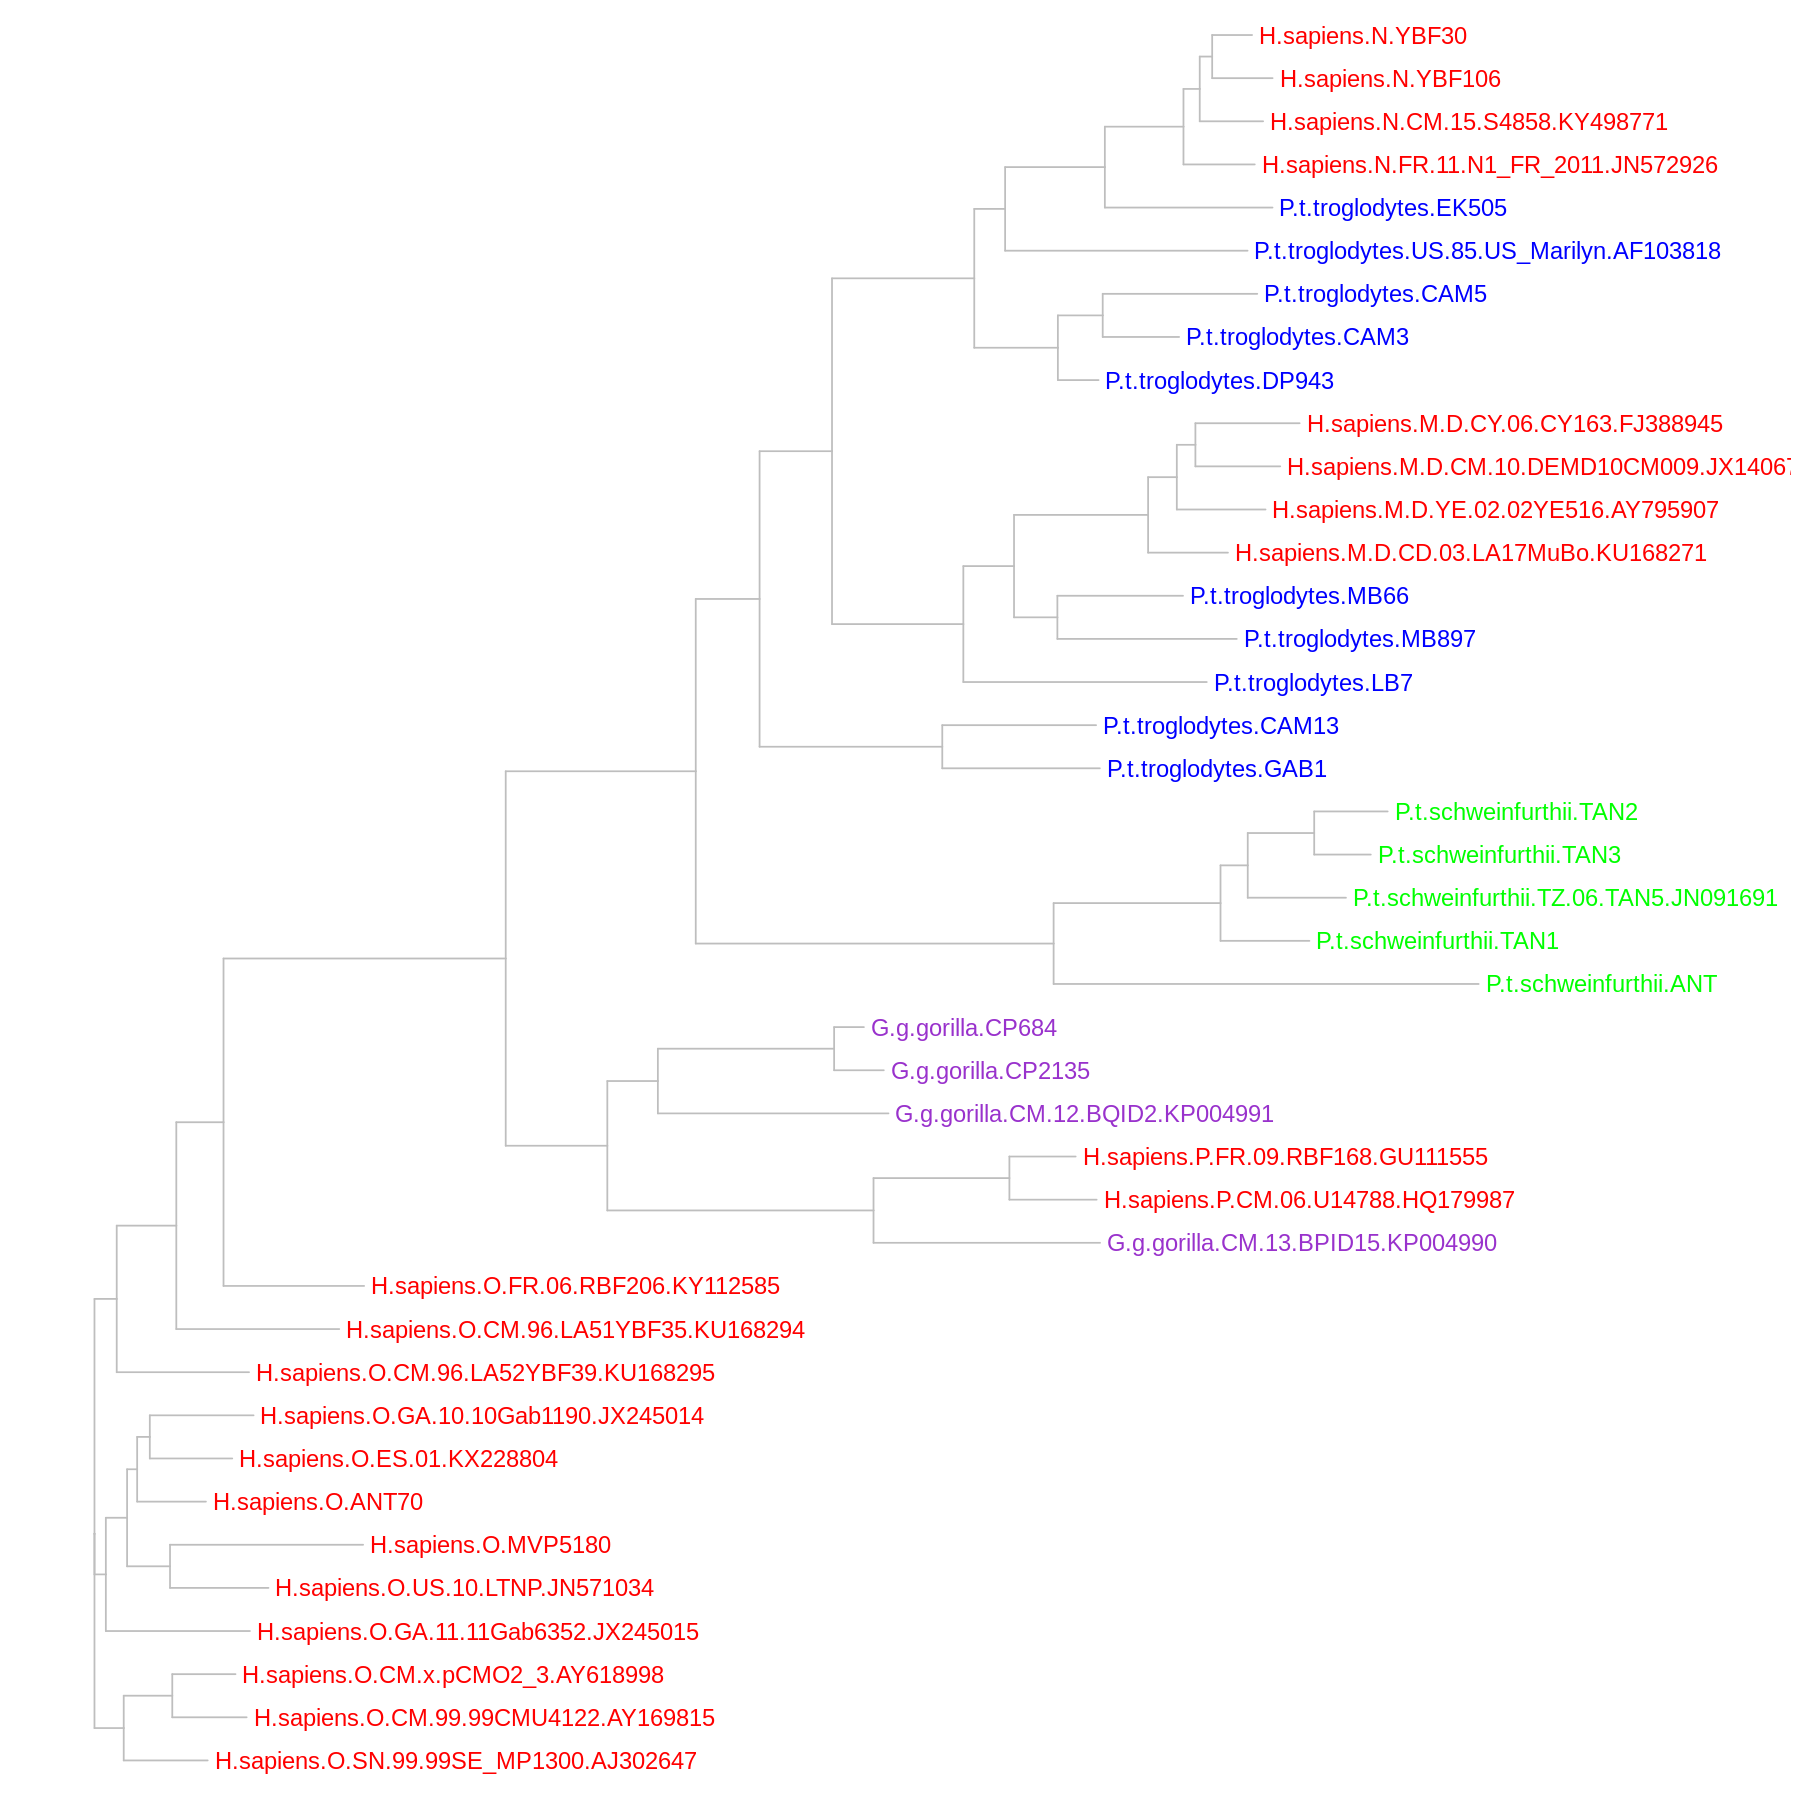

In [181]:
groups = read.table("SIV_HIV.tsv.txt",             # We import the metadata into a variable  
                        sep = "\t",                # Tell R the input is tab separated
                        col.names = c("Sequence",
                                      "Species"),  # Names of columns
                        header = FALSE,            # Tell R there is no header in the file
                        stringsAsFactors = FALSE)  # Convert strings to factors

# Next we aassign colours to each species
SIVHIV_colors = c(Hylobates_lar = "#E7B800",
                  P.pygmaeus= "#FC4E07", 
                  P.abelii = "darkgreen",
                  P.tapanuliensis = "seagreen",
                  G.beringei = "orange",
                  G.g.gorilla = "darkorchid",
                  H.sapiens = "red",
                  P.t.troglodytes = "blue",
                  P.paniscus = "orange2",
                  P.t.schweinfurthii = "green")


# We create a space to plot below
options(repr.plot.width=15, repr.plot.height=15)

tree = read.tree("SIVHIVspecies_ENV.nwk")  # First we import the tree file into a variable

SIVHIV = as.treedata(full_join(as_tibble(tree), 
                        groups, 
                        by = c("label" = "Sequence")))

# rooted_SIVHIV = root((as.treedata(SIVHIV)), 
#                     "G.g.gorilla", resolve.root = TRUE)

ggtree(SIVHIV, 
       color = "grey") + 
  geom_tiplab(aes(color = Species), size = 5) + 
  scale_color_manual(values=SIVHIV_colors) +
  xlim(0, 1) + 
  theme(legend.position = "none") 

You can use modify the code to colour it in more appropriately if you wish. Maybe change the colour to highlight Human HIV sequences in red?

The name contains a lot of metadata. The letter after H.sapiens indicates the HIV1 group to which that sequence belongs. Then the country from which it was isolated. Then the year. Then some identifiers and GenBank accession number. So `H.sapiens.O.CM.96.LA51YBF35.KU168294` is HIV1 group O, from Cameroon, isolated in 1996, with sample code LA51YBF35 and genbank accession number KU168294.

It may help you to talk about HIV1 group O, or group P, or group N in your explanations and in your annotations of the tree.

Make sure you then download the annotated tree and save it somewhere safe for your report. If you want to save several differently coloured tree (a good idea) then remember to change the filename below else they will overwrite the previous file.

In [ ]:
# --------------------------------
# Save the tree as a graphics file
# --------------------------------
# remember to save these files and take them away
ggsave("SIVHIV.png")

## Interpreting the tree

The tree shows the diversity of great ape immunodeficiency viruses. Here are some questions that you could write about in your report. They are suggestions only, you can set yourself different or extra questions also, you decide.

**Does the pattern of S/HIV represent the evolutionary history of the species? Has the virus speciated along with these apes or is it more complex than that?**

**If you think there has been a zoonotic spread of SIV, ie a transfer to humans, is there a single origin or multiple transfers of HIV1?**

**Can you determine anything about the geography of the transfer of the pandemic strain (M)? Think about the subspecies of the source. What is their gepgraphic range? Maybe you wish to include a map in your report? Wikipedia has one**

It is useful to think about how you will provide phylogenetic evidence for your answer to each of the questions above. How can you annotate a phylogeny to demonstrate the evidence for your conclusion. Poor reports will rely largely on written descriptions of a tree, excellent reports make a powerful link between the text and the figure, using annotations to make their points very clear.


## Writing your assessed report

There is extensivehelp on the Canvas site on what to include and how to structure your report. You should discuss your conclusions and figures with a demonstrator or myself before leaving however. Please make sure that you have downloaded image files of any trees that you need to include in your report. This Jupyter lab environment may continue to work but I can't guarrantee it's availability past the end of the practical (that is out of my hands).

<hr>
<h2><font color='Blue'>What skills have you acquired?</font></h2>

If you have completed this practical I think you have now showed your competency in a range of important practical and conceptual skills:
1. Understanding the use of phylogenetic trees
2. Basic use of Jupyter notebooks
3. Basic use of R to characterise sequence data files
4. Basic use of R to align DNA sequence data and build a phylogenetic tree
5. Use of R to programmatically annotate a phylogenetic tree

These are the sorts of phrases you could include on you cv if you wished.

## Software References

1. Yu G, Smith D, Zhu H, Guan Y, Lam TT (2017). ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution, 8, 28-36. doi: 10.1111/2041-210X.12628
2. Katoh K, Toh H. Recent developments in the MAFFT multiple sequence alignment program. Brief Bioinform. 2008;9: 286–298. doi:10.1093/bib/bbn013
3. Capella-Gutiérrez S, Silla-Martínez JM, Gabaldón T. trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses. Bioinformatics. 2009;25: 1972–1973. doi:10.1093/bioinformatics/btp348
4. Price MN, Dehal PS, Arkin AP. FastTree 2 – Approximately Maximum-Likelihood Trees for Large Alignments. PLoS ONE. 2010. p. e9490. doi:10.1371/journal.pone.0009490
5. Eaton DAR. Toytree: A minimalist tree visualization and manipulation library for Python. Methods Ecol Evol. 2020;11: 187–191. doi:10.1111/2041-210X.13313


## Case Study References

You should look for more references for your report, but these are a good place to start:

Sharp PM, Hahn BH. Origins of HIV and the AIDS pandemic. Cold Spring Harb Perspect Med. 2011;1: a006841. doi:10.1101/cshperspect.a006841

Locke DP, Hillier LW, Warren WC, Worley KC, Nazareth LV, Muzny DM, et al. Comparative and demographic analysis of orang-utan genomes. Nature. 2011;469: 529–533. doi:10.1038/nature09687

Nater A, Mattle-Greminger MP, Nurcahyo A, Nowak MG, de Manuel M, Desai T, et al. Morphometric, Behavioral, and Genomic Evidence for a New Orangutan Species. Curr Biol. 2017;0. doi:10.1016/j.cub.2017.09.047

